In [12]:
import numpy as np
import astropy.units as u 
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
%config InlineBackend.figure_format = 'svg'

$\frac{m\lambda}{d} = \sin{\theta}$ (Eq. 75)

$\frac{m\lambda}{\sin{\theta}} = d$

$\lambda = \frac{d\sin{\theta}}{m}$

In [14]:
"""HeData.png"""                                         # Total of 8 entries.
m          = np.array([1,1,1,1,1,1,2,2])
a_1        = np.array([11.5,10,8.78,7.72,7.67,6.5,20.25,17.25])
a_2        = np.array([11.5,10,9.2,8.5,8.2,7.22,20.33,17.42])
wavelength = np.array([668,588,501,492,447,388,588,501]) # Wavelength of photon, nanometer scale.

color = ['red','yellow','green','cyan','blue','violet','yellow','green']

In [15]:
theta       = (a_1+a_2)/2   # Take the average of both angles, assuming a_1 = a_2 = theta_1 = theta_2.
sigma_theta = (1/(60*(2)**(1/2)))*(np.pi/180.) # DOES NOT CURRENTLY INCORPORATE DELTA. ONLY +-1 ARCMINUTE ERROR.

d_list      = (m*wavelength)/(np.sin(theta*(np.pi/180.)))   # Obtain an array for d, grating spacing.
sigma_d     = np.abs(-(m*wavelength*np.cos(theta*(np.pi/180.)))/(np.sin(theta*(np.pi/180.))**2)*(sigma_theta))

weights          = sigma_d**-2
d_weighted       = np.sum(weights*d_list)/np.sum(weights)
sigma_d_weighted = np.sum(weights)**(-1/2)

d = np.mean(d_list)
# We obtain the grating spacing from Helium's values!
print('unweighted result for d, the grating spacing: ', d)
print('weighted average for d: ', d_weighted)
print('uncertainty in weighted average: ', sigma_d_weighted)

unweighted result for d, the grating spacing:  3333.869320419858
weighted average for d:  3356.843520411733
uncertainty in weighted average:  1.1117856883742387


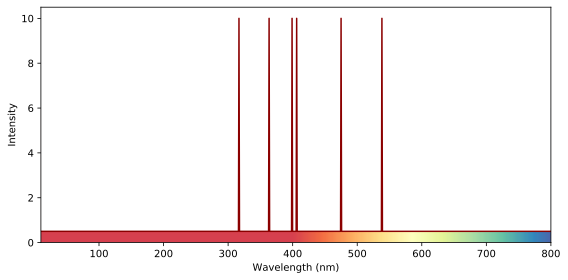

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)

wavelengths = np.linspace(1e1, 8e2, 1000)
spectrum = np.full((1000),0.5)

for index in wavelength:
    spectrum[int(index)] = 10

plt.plot(wavelengths, spectrum, color='darkred')

y = np.linspace(0, 6, 100)
X,Y = np.meshgrid(wavelengths, y)
X[X<400] = 400
extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))

plt.imshow(X, clim=(350,820),  extent=extent, cmap=plt.get_cmap('Spectral'), aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

plt.fill_between(wavelengths, spectrum, 8, color='w')
plt.savefig('WavelengthColors.png', dpi=300)

plt.show()

$\frac{1}{\lambda} = R_{H}\left(\frac{1}{n_{2}^{2}}-\frac{1}{n_{1}^{2}}\right)$ (Eq. 80)

$R_{H} = \frac{1}{\lambda \left(\frac{1}{n_{2}^{2}}-\frac{1}{n_{1}^{2}}\right)}$

In [70]:
"""HData.png"""                                         # Total of 8 entries.
m     = np.array([3,3,2,2,2,1,1,1])                     # m, integer energy level.
a_1   = np.array([36,25.67,23,16.67,15,11.25,8.33,7.5]) # alpha_1, first angle in degrees.
a_2   = np.array([36,25.5,22.75,16.67,14.77,11,8,7.33]) # alpha_2, second angle in degrees.

color = ['red','cyan','red','cyan','violet','red','cyan','violet']

In [71]:
theta     = (a_1+a_2)/2
delta     = (a_1-a_2)/2
wavelength = (d_weighted*np.sin(theta*(np.pi/180.)))/m
# We obtain the wavelength for Hydrogen!
sigma_wavelength = ((np.sin(theta*(np.pi/180.))*sigma_d_weighted/m)**2
                    +(d_weighted*np.cos(theta*(np.pi/180.))*sigma_theta/m)**2)**(1/2)

print(wavelength)
print(sigma_wavelength)

[657.70103852 483.21721612 652.43941337 481.4703303  431.1526254
 647.70335298 476.75330836 433.21814904]
[0.2865665  0.262118   0.38453889 0.3671602  0.36292176 0.71064236
 0.70146944 0.69956404]


In [72]:
# from astropy.constants import e, m_e, eps0, h

# def Hydrogen_energy_n(n):
#     E_N = -(1/n**2)*(((e.emu**4)*m_e)/(8*h*eps0))
#     return E_N

# Hydrogen_energy_n(n=2).decompose()

In [73]:
def rydberg(wavelength,n_2,n_1):
    RYDBERG = (wavelength*((1/n_2**(2))-(1/n_1**(2))))**-1
    return RYDBERG[:]

In [74]:
energy_states = np.array([3,4,3,4,5,3,4,5]) # We assign, based on known wavelengths for Balmer Series jumps.

In [75]:
rydberg       = rydberg(wavelength,n_2=np.full((8),2),n_1=energy_states)
sigma_rydberg = sigma_wavelength*(wavelength**2*((1/np.full((8),2)**(2))-(1/energy_states**(2))))**-1

In [77]:
weights                = sigma_rydberg[:]**-2
rydberg_weighted       = np.sum(weights*rydberg)/np.sum(weights)
sigma_rydberg_weighted = np.sum(weights)**(-1/2)

print('unweighted result for rydberg: ', np.mean(rydberg))
print('weighted average for rydberg: ', rydberg_weighted)
print('uncertainty in weighted average for rydberg: ', sigma_rydberg_weighted)

unweighted result for rydberg:  0.011054568360672198
weighted average for rydberg:  0.011019293340599912
uncertainty in weighted average for rydberg:  2.7250620609096443e-06


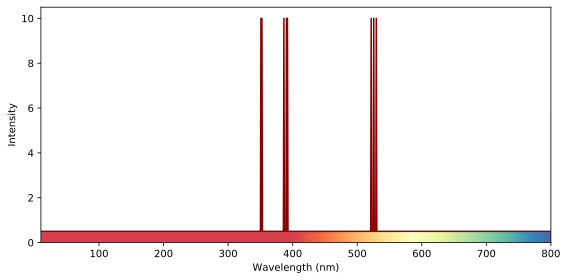

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)

wavelengths = np.linspace(1e1, 8e2, 1000)
spectrum = np.full((1000),0.5)

for index in wavelength:
    spectrum[int(index)] = 10

plt.plot(wavelengths, spectrum, color='darkred')

y = np.linspace(0, 6, 100)
X,Y = np.meshgrid(wavelengths, y)
X[X<400] = 400
extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))

plt.imshow(X, clim=(350,820),  extent=extent, cmap=plt.get_cmap('Spectral'), aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

plt.fill_between(wavelengths, spectrum, 8, color='w')
plt.savefig('WavelengthColors.png', dpi=300)

plt.show()

In [11]:
"""HeNeData.png"""                            # Total of 3 entries.
m          = np.array([1,2,3])
a_1        = np.array([10.5,22,33.5])
a_2        = np.array([11,22.5,34.17])
theta      = np.array([10.75,22.25,33.84])    # Don't know what this angle is?
wavelength = np.array([628.06,637.49,624.96])

color = ['red','red','red']